### PHYS 4030 (Fall 2020) - HW 1

---

#### Due Date:  Sept. TBD, 2020 11:30 AM



#### Questions

1. Get EXhoResonanceE.m (and associated codes; available on course eClass website) up and running on your computer so to be able to generate a plot as shown below. Change the figure title so to have it include your name and submit that figure as a pdf. Note that you will likely have problems (e.g., missing a sub-routine); feel free to ask [CB] if you are having issues with code or [EH] issues w/ Jupyter.

<img src="Images/resonance.jpg" alt="drawing" width="400"/>

Figure 1: Output figure from EXhoResonanceE.m.

#### Reading in Matlab

How shall we run Matlab here in our jupyter notebook?

#### First: import matlab (copy the below for all your future Matlab code)

In [19]:
import matlab.engine
import io
from IPython.core.magic import register_cell_magic
ip = get_ipython()

out = io.StringIO()
err = io.StringIO()

# Setup matlab cell magic #
@register_cell_magic
def matlab_magic(line,cell):
    out.truncate(0)
    out.seek(0)
    err.truncate(0)
    err.truncate(0)
    raw = '''{line}.eval("""{cell}""", nargout=0, stdout=out, stderr=err)'''
    ip.run_cell(raw.format(line=line, cell=cell))
    print(out.getvalue())
    print(err.getvalue())

#### Second: activate Matlab in Python

In [20]:
eng = matlab.engine.start_matlab()

#### Third: Use Matlab magic as the first line in your matlab cell

In [21]:
## %%matlab_magic eng

#### Let's try it with Prof. Bergevin's file: EXregressAnscombe.m

In [23]:
%%matlab_magic eng

% ### EXregressAnscombe.m ###     2017.02.23 C.Bergevin

% Code to reproduce Anscombe's quartet fits 
% (as per https://en.wikipedia.org/wiki/Anscombe's_quartet#/media/File:Anscombe%27s_quartet_3.svg

% Notes
% o Uses Matlab's built-in polyfit.m function (see also EXregressLinear1.m
% if you wanted to do this manually)
% o Values obtained from http://hywelowen.org/anscombes-quartet/
% o First set of data (x1,y1) would be x1=A(:,1), y1=A(:,2). Similarly for
% the others
% o Ref: https://en.wikipedia.org/wiki/Anscombe's_quartet and
% https://en.wikipedia.org/wiki/Coefficient_of_determination

clear
% =========================================================

% --- specify the associated data
A=[10 	8.04 	10 	9.14 	10 	7.46 	8 	6.58;
8 	6.95 	8 	8.14 	8 	6.77 	8 	5.76;
13 	7.58 	13 	8.74 	13 	12.74 	8 	7.71;
9 	8.81 	9 	8.77 	9 	7.11 	8 	8.84;
11 	8.33 	11 	9.26 	11 	7.81 	8 	8.47;
14 	9.96 	14 	8.1 	14 	8.84 	8 	7.04;
6 	7.24 	6 	6.13 	6 	6.08 	8 	5.25;
4 	4.26 	4 	3.1 	4 	5.39 	19 	12.5;
12 	10.84 	12 	9.13 	12 	8.15 	8 	5.56;
7 	4.82 	7 	7.26 	7 	6.42 	8 	7.91;
5 	5.68 	5 	4.74 	5 	5.73 	8 	6.89];

% --- loop through for each of the four data sets and do the analysis
cnt= 1; figure(1); clf;
for nn=1:4
    tempX= A(:,cnt); tempY=A(:,cnt+1);  % extract relevant #s from A
    [junk,indx]= sort(tempX);   % reorder (not necessary)
    x= tempX(indx); y= tempY(indx);
    p(nn,:)= polyfit(x,y,1);
    f= p(nn,1)*x + p(nn,2);
    % --- determine R ("Coefficient of determination")
    yM= sum(y)/numel(y);
    SStot= sum((y-yM).^2); SSreg= sum((f-yM).^2); SSres= sum((y-f).^2);
    Rsquared= 1- SSres/SStot;
    % --- visualize
    subplot(2,2,nn); h= plot(x,y,'o','LineWidth',1); xlabel('x'); ylabel('y');
    set(h(1),'MarkerEdgeColor','k','MarkerFaceColor',[1 .5 0]); hold on; grid on;
    h2= plot(x,f,'b-');
    % --- indicate best fit params
    disp(['Set ',num2str(nn),': best fit is y=',num2str(p(nn,1)),'x+',num2str(p(nn,2)),...
        ' --> R^2=',num2str(Rsquared)]);
    cnt= cnt+2; % update indexer
end


Set 1: best fit is y=0.50009x+3.0001 --> R^2=0.66654
Set 2: best fit is y=0.5x+3.0009 --> R^2=0.66624
Set 3: best fit is y=0.49973x+3.0025 --> R^2=0.66632
Set 4: best fit is y=0.49991x+3.0017 --> R^2=0.66671




#### Compare Python Anscombe

Index(['dataset', 'x', 'y'], dtype='object')
Anscombe data set Number ['I' 'II' 'III' 'IV']
  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
Set I stats                x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
Set II stats                x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000


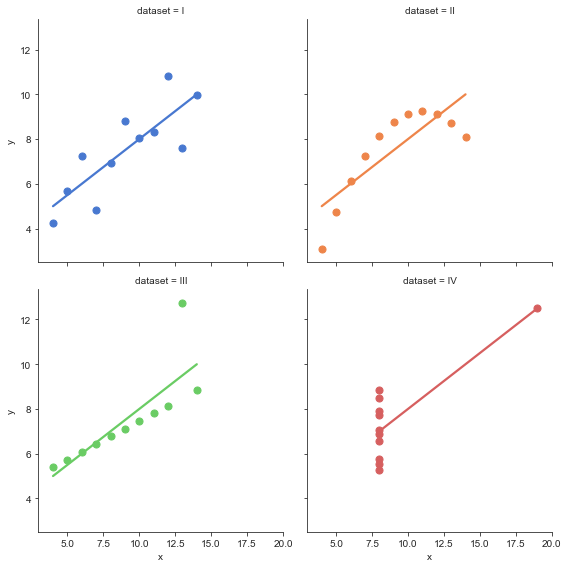

In [39]:
#Code to reproduce Anscombe's quartet fits 
#(as per https://en.wikipedia.org/wiki/Anscombe's_quartet#/media/File:Anscombe%27s_quartet_3.svg

import seaborn as sns
sns.set_style(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
print(df.columns)
print('Anscombe data set Number',df['dataset'].unique())
print(df.head())
print('Set I stats',df[df['dataset']=='I'].describe())
print('Set II stats',df[df['dataset']=='II'].describe())

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

2. This problem asks you to write a code related to motivate some basic data analysis topics (resampling, dithering, compressive sampling) via an image example. What you need to do is write a single code that does the following:
 * Read in and display a grayscale image of your choice (e.g., a cat in a box). Have the code specify the dimensions of the image (i.e., M × N ) and the total number of pixels (i.e., M N ).
 * Specifying a “scale factor” α (≥ 1), resample and plot the image using a regularly-spaced grid where the total number of points is reduced by a factor of 1/α2 (e.g., M → M/α).
 * Using that same α, resample and plot the image using randomly spaced sampling.
 * For one of the resampled images, add in some dithering (i.e., additive noise), where you can scale the intensity of the noise (call it some scale factor δF ) and plot.
 * Explore different values of α and δF , possibly for different images. Comment briefly as to whether grid-based or random resampling leads to a “better” sub-sampled image and whether dithering helps. Lastly, comment briefly on how you might improve your random resampling might be improved if you had some expectation as to what your image might look like (Hint: Google com- pressed sensing).
 
 Most images are RBG by default (i.e., M × N × 3). To create a grayscale image, you need to convert it to M × N × 1.
 
 Note that it might be helpful to allow one to invert the background, as well as keep the pixel intensities over a limited range (e.g., an “8-bit” image with intensities ∈ [0, 255]). Ultimately your code should produce a plot along the lines of what is shown below:
 
 <img src="Images/cat.jpg" alt="drawing" width="400"/>
 
 Figure 2: Different ways to represent a cat in a box (or various probability distributions of such).

#### Part 2, some fun with statistics

3. Descriptive statistics check. For the random data below, do the following:
 * Find the mean, median and mode of the data given
 * Determine if this data is skewed or symetric
 * Describe the variance, range, and standard deviation
 * Compare to a 'real world' data set of your choice
 * Normalize with a z transform
 * Plot the distribution and discuss your results

In [5]:
# Descriptive Statistics
# Note important libraries are always imported in the first cells
import numpy as np
import random
from scipy import stats
import pandas as pd
import seaborn as sns

randomlist = []
for i in range(0,15):
    n = random.randint(1,30)
    randomlist.append(n)
print(randomlist)


[9, 8, 6, 24, 15, 23, 12, 30, 10, 9, 2, 11, 2, 23, 5]
